# GeoPandas:  csv to shp file and visualization etc

https://geohackweek.github.io/vector/04-geopandas-intro/


In [49]:
import os, sys,glob

import folium
from IPython.display import display

from shapely.geometry import mapping

%matplotlib inline

import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

In [2]:
def csv_latlon2points(csvfile):
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    crs = {'init': 'epsg:4283'}  # GDA94
    geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

    return geo_df

In [5]:
path2csv='E:/Data/MT_Datasets/WenPingJiang_SHP/phase_tensor_1.0547Hz.csv'
# path2csv='/e/Data/GA_Works/E_Data_Modelling_Isa/EDI_edited_10Hz_1000s_SHP/phase_tensor_tipper_0.011Hz.csv'
path2dir=os.path.dirname(path2csv)
mygdf=csv_latlon2points(path2csv)

In [6]:
# mygdf.head()
mygdf.shape

(137, 15)

In [7]:
mygdf.crs

{'init': 'epsg:4283'}

In [8]:
shape_fname='geopandas_made.shp'
outshp=os.path.join(path2dir,shape_fname)
mygdf.to_file(outshp, driver='ESRI Shapefile')


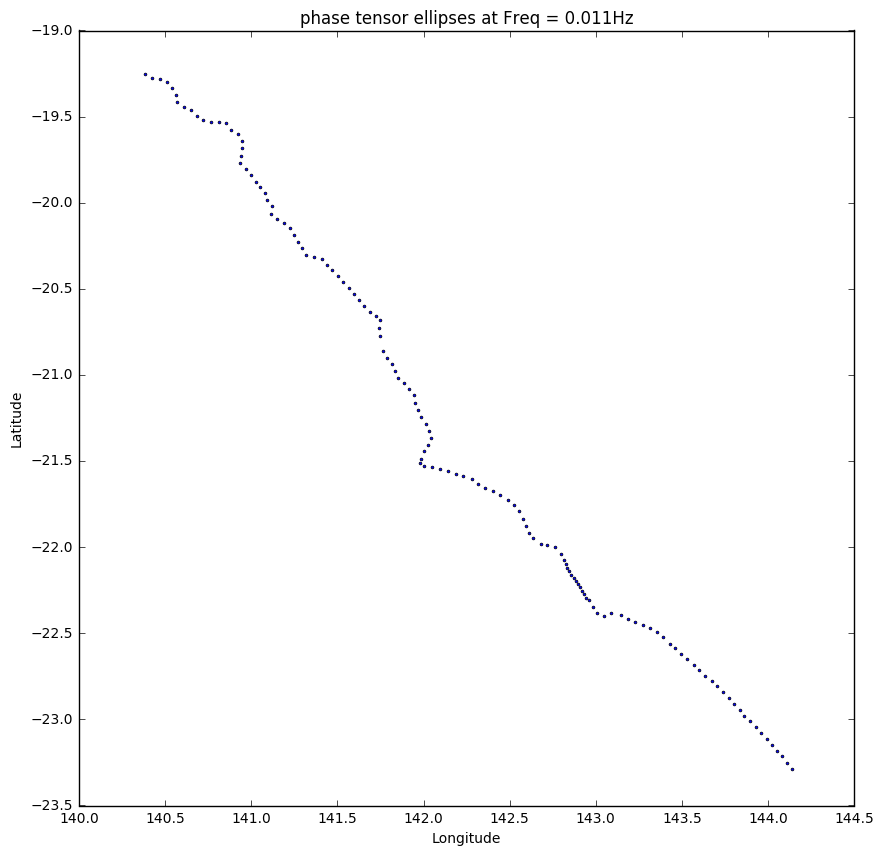

In [36]:
title_str='phase tensor ellipses at Freq = 0.011Hz'
myax = mygdf.plot(figsize=[20,10], linewidth=2.0, color='b', cmap='jet')

#myax.set_xlim([140.5,141.0])
#myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

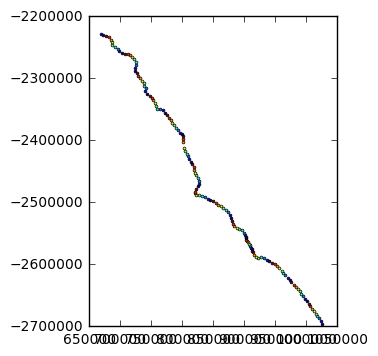

In [37]:
mygdf.to_crs({'init':'epsg:3112'}).plot()  # 3112 is GDA94/GALambertConformal

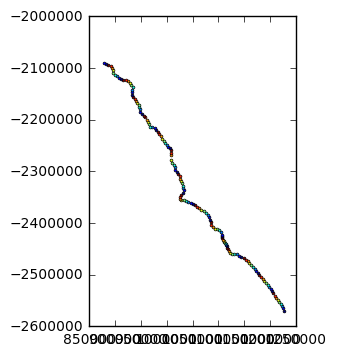

In [11]:
mygdf.to_crs({'init':'epsg:3577'}).plot()  #EPSG Projection 3577 - GDA94 / Australian Albers 

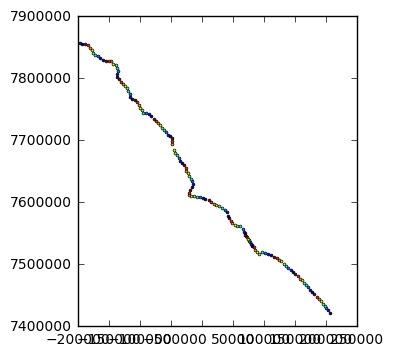

In [12]:
mygdf.to_crs({'init':'epsg:28355'}).plot() #28355 http://spatialreference.org/ref/epsg/gda94-mga-zone-55/

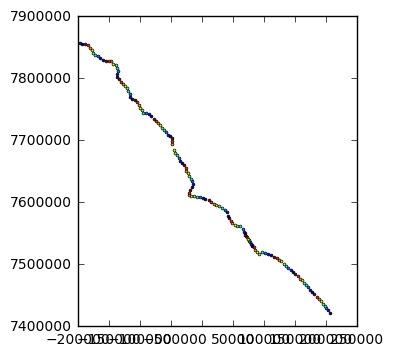

In [13]:
mygdf.to_crs({'init':'epsg:32755'}).plot() #32755 is WGS84/UTMS55

In [14]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

#mpl.rcParams['figure.figsize']=(8,30)

In [15]:
gdf_utm54=mygdf.to_crs({'init':'epsg:32754'})  #.plot()

outshp=os.path.join(path2dir,'geopandas_made_utm54.shp')

gdf_utm54.to_file(outshp, driver='ESRI Shapefile')


In [16]:

geojson = mygdf.to_json()
bounds = mygdf.total_bounds


In [17]:
print bounds

(140.38036666666667, -23.288866722222227, 144.13804999999999, -19.2547)


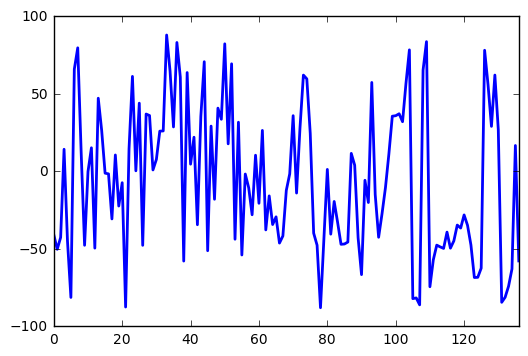

In [18]:
mygdf['azimuth'].plot()

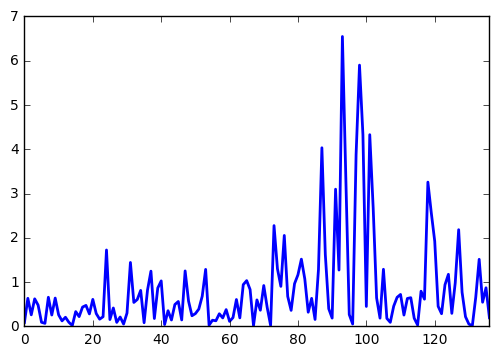

In [19]:
mygdf['skew'].abs().plot()

In [20]:
mygdf.columns

Index([u'station', u'freq', u'lon', u'lat', u'phi_min', u'phi_max', u'azimuth',
       u'skew', u'n_skew', u'elliptic', u'tip_mag_re', u'tip_mag_im',
       u'tip_ang_re', u'tip_ang_im', u'geometry'],
      dtype='object')

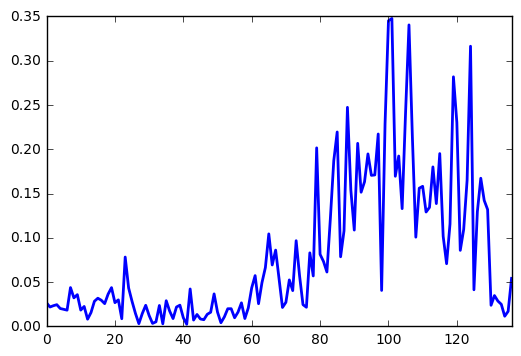

In [21]:
mygdf['elliptic'].plot()

In [22]:
mygdf['skew'].describe()

count    137.000000
mean       0.188673
std        1.377301
min       -4.330001
25%       -0.295226
50%        0.140968
75%        0.634977
max        6.546954
Name: skew, dtype: float64

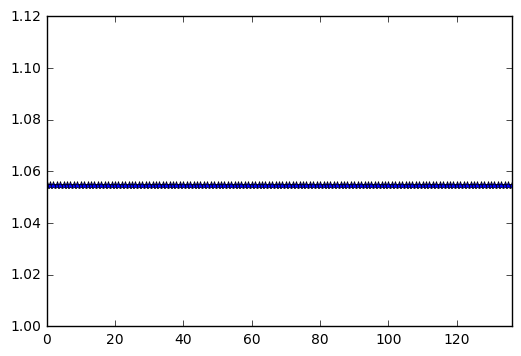

In [23]:
#mygdf['frequency'].plot(marker='*')   # tolerance ftol=10%

mygdf['freq'].plot(marker='*')   # tolerance ftol=10%

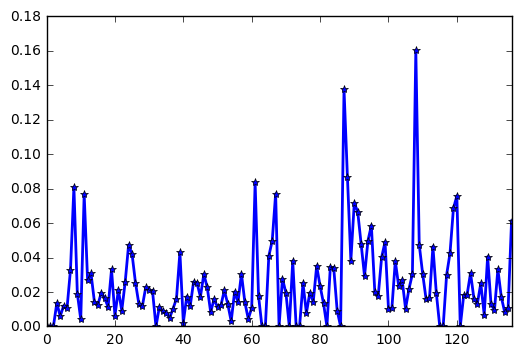

In [24]:
mygdf['tip_mag_re'].plot(marker='*')  

#mygdf['tip_ang_re'].plot(marker='*')  

In [25]:
# output jeojson?

# Construct phase_tensor Ellipses and Tippers 

## write to shape files with different projections: wgs84, utm, etc.

- https://geohackweek.github.io/vector/04-geopandas-intro/
OR
- http://nbviewer.jupyter.org/github/geohackweek/vector/blob/gh-pages/docker/notebooks/geopandas_intro.ipynb

- Like shapely, these spatial data types are limited to discrete entities/features and do not address continuously varying rasters or fields.

- While GeoPandas spatial objects can be assigned a Coordinate Reference System (CRS), operations can not be performed across CRS’s. Plus, geodetic (“unprojected”, lat-lon) CRS are not handled in a special way; the area of a geodetic polygon will be in degrees.


In [26]:
mygdf.iloc[-1]  # last row or feature

station                                   11330a
freq                                      1.0547
lon                                       140.38
lat                                     -19.2547
phi_min                                  35.3685
phi_max                                  39.4292
azimuth                                  -57.735
skew                                    0.195567
n_skew                                  0.391133
elliptic                               0.0542898
tip_mag_re                             0.0612955
tip_mag_im                             0.0761556
tip_ang_re                              -160.088
tip_ang_im                               136.475
geometry      POINT (140.3803666666667 -19.2547)
Name: 136, dtype: object

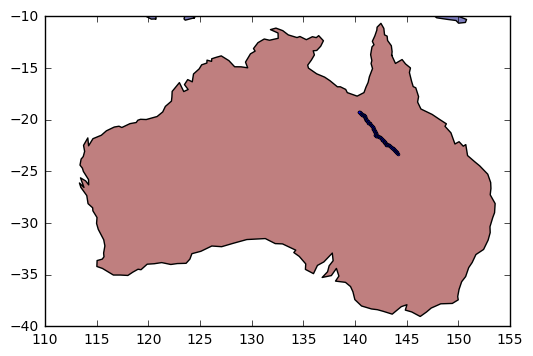

In [27]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5)

myax.set_xlim([138,150])
myax.set_ylim([-30,-10])

myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
              
mygdf.plot(ax=myax, figsize=(10, 20), marker='o', color='blue', markersize=2);

# Construct phase_tensor Ellipses and Tippers 

# write to shape files with different projections: wgs84, utm, etc.

In [28]:
import numpy as np
    
from shapely.geometry import Point, Polygon, LineString, LinearRing

def create_tipper_real_shp(csvfile,  arr_size=4):
    """ create tipper lines shape file.  
    Must use a GIS software such as ArcGIS to display and add an arrow at each line's end
    arr_size=4  how long will be the line (arrow)
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    #geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    pdf['tip_re'] = pdf.apply(lambda x: 
        LineString([(float(x.lon), float(x.lat)), 
                    (float(x.lon)+ arr_size*x.tip_mag_re*np.cos(-np.deg2rad(x.tip_ang_re)),
                     float(x.lat)+ arr_size*x.tip_mag_re*np.sin(-np.deg2rad(x.tip_ang_re)))]), axis=1)


    pdf = gpd.GeoDataFrame(pdf, geometry='tip_re')
    
    return pdf


In [29]:
tipdf=create_tipper_real_shp(path2csv, arr_size=0.1)

tipdf.to_file('tip_re.shp', driver='ESRI Shapefile')

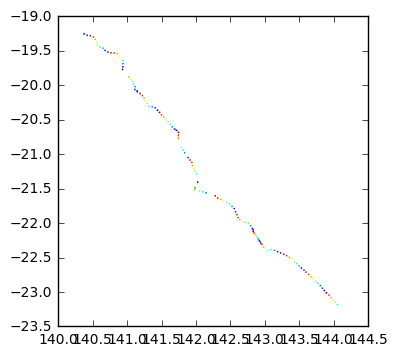

In [30]:
tipdf.plot()

In [31]:
tipdf.head()

,station,freq,lon,lat,phi_min,phi_max,azimuth,skew,n_skew,elliptic,tip_mag_re,tip_mag_im,tip_ang_re,tip_ang_im,tip_re
0,10020,1.0547,144.138050,-23.288867,36.719049,38.729904,-40.852862,-0.090263,-0.180525,0.026652,0.000000,0.000000,-180.000000,-180.000000,"LINESTRING (144.13805 -23.28886672222223, 144...."
1,10030,1.0547,144.112300,-23.251117,39.291961,41.053718,-50.223378,0.634977,1.269954,0.021927,0.000000,0.000000,-180.000000,-180.000000,"LINESTRING (144.1123 -23.25111672222222, 144.1..."
2,10040,1.0547,144.078550,-23.212067,36.533068,38.285453,-42.563097,0.262179,0.524359,0.023422,0.000000,0.000000,-180.000000,-180.000000,"LINESTRING (144.07855 -23.21206672222222, 144...."
3,10050,1.0547,144.053933,-23.181600,37.474078,39.361854,14.302584,0.623671,1.247343,0.024569,0.013520,0.007261,83.868239,-163.664182,LINESTRING (144.0539333333333 -23.181600055555...
4,10060,1.0547,144.024900,-23.149067,36.905434,38.432004,-44.908926,0.481328,0.962655,0.020263,0.005976,0.010937,50.805732,175.062113,"LINESTRING (144.0249 -23.14906672222223, 144.0..."


In [32]:

# re-project the geopandas df into different epsg, then write out to shape files.


In [33]:

# http://toblerity.org/shapely/manual.html#polygons
# https://geohackweek.github.io/vector/04-geopandas-intro/
    
from shapely.geometry import Point, Polygon, LinearRing

def create_phase_tensor_ellipse_shp(csvfile, esize=0.03):
    """ create phase tensor ellipse
    esize is ellipse size, defaut 0.03 is about 3KM in the max ellipse rad
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    
    # make  pt_ellispes using polygons
    PHIMAX=pdf['phi_max'].max() # the max of this group of ellipse
    
    print PHIMAX
    
    theta = np.arange(0, 2 * np.pi, np.pi / 30.) # points to trace out the polygon-ellipse
 
    azimuth = -np.deg2rad(pdf['azimuth'])
    width = esize * (pdf['phi_max'] /PHIMAX)
    height = esize * (pdf['phi_min'] / PHIMAX)
    x0 = pdf['lon']
    y0 = pdf['lat']

# apply formula to generate ellipses
  
    ellipse_list=[]
    for i in xrange(0, len(azimuth)):
        x = x0[i] + height[i] * np.cos(theta) * np.cos(azimuth[i]) - width[i] * np.sin(theta) * np.sin(azimuth[i])
        y = y0[i] + height[i] * np.cos(theta) * np.sin(azimuth[i]) + width[i] * np.sin(theta) * np.cos(azimuth[i])

        polyg= Polygon(LinearRing([xy for xy in zip(x, y) ]))
        
        #print polyg  # an ellispe
        
        ellipse_list.append(polyg)
        
    
#     for xi, yi in zip(x, y):
#         polyg.(np.round(xi, 6), np.round(yi, 6))
        
        
#                     # 1) make a geometry shape of the ellipse
#                     ellipse = ogr.Geometry(ogr.wkbLinearRing)
#                     ellipse.CloseRings()

#                     # 2) make a polygon
#                     poly = ogr.Geometry(ogr.wkbPolygon)
#                     poly.AddGeometry(ellipse)

#                     poly_list.append(poly)

    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=ellipse_list)
    
    return pdf

In [39]:
CSVDIR='E:/Data/MT_Datasets/WenPingJiang_SHP/'
#CSVDIR='/e/Data/GA_Works/E_Data_Modelling_Isa/EDI_edited_10Hz_1000s_SHP'
csvfiles=glob.glob(CSVDIR+'/*.csv')

print (len(csvfiles))
for acsv in csvfiles[:2]:
    p = create_phase_tensor_ellipse_shp(acsv)
    
    #p.plot()
    shp_fname = acsv.replace('.csv','.shp')
    
    p.to_file(shp_fname, driver='ESRI Shapefile')
    
    

175
89.9658368424
88.4224695872


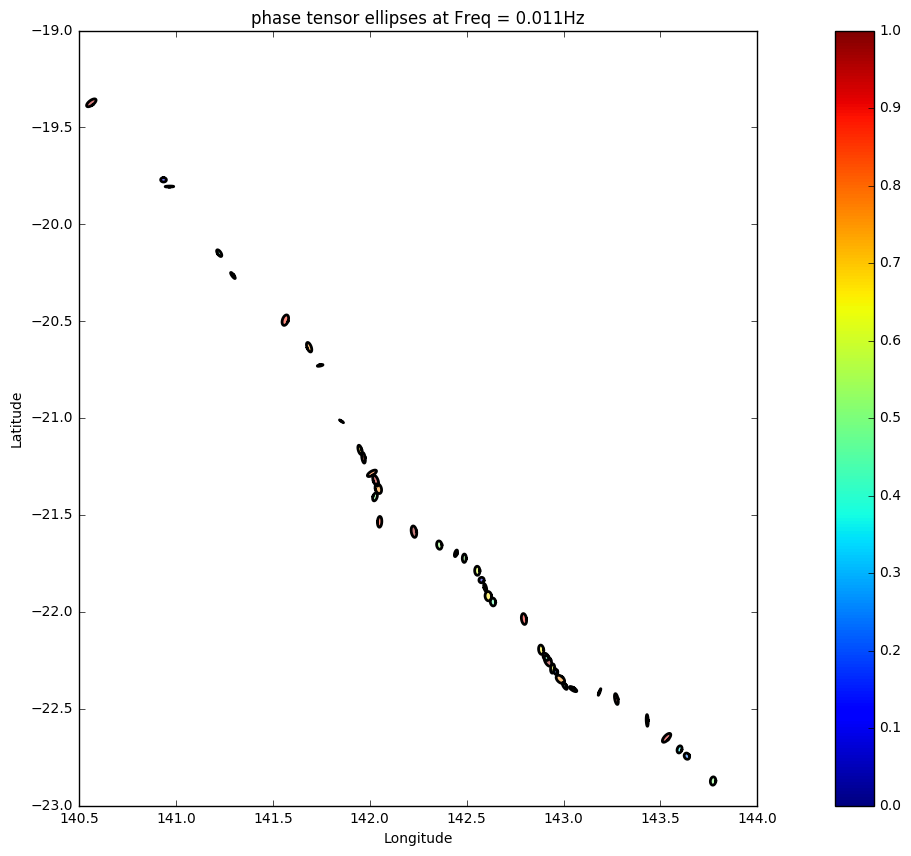

In [41]:

import matplotlib.pyplot as plt

myax = p.plot(figsize=[20,10], linewidth=2.0, column='phi_max', colormap='jet') # , vmin=vmin, vmax=vmax)

#myax.set_xlim([140.2,141.2])
#myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

# add colorbar
fig = myax.get_figure()
cax = fig.add_axes() #([0.7, 0.05, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='jet') #, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

In [42]:
print p.crs

{'init': 'epsg:4326'}


In [43]:
mygdf28354=p.to_crs({'init':'epsg:28354'})  # utm zone54  long=138-144

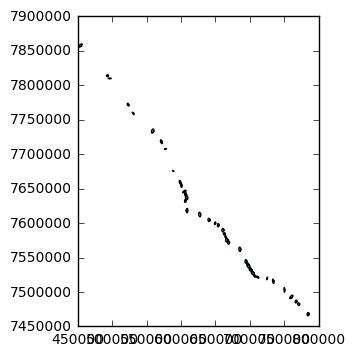

In [44]:
mygdf28354.plot()

In [45]:
mygdf3112=p.to_crs({'init':'epsg:3112'})  #EPSG:3112 is GDA94 Lambert Confomal (GA LCC)

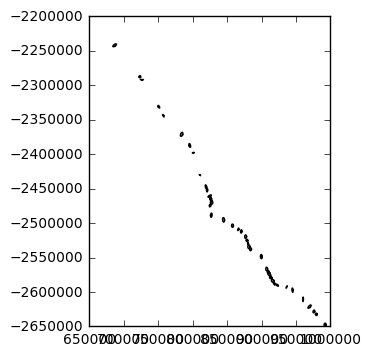

In [46]:
mygdf3112.plot()

In [48]:
mygdf3112.crs

{'init': 'epsg:3112'}

In [47]:
mygdf3112.head(5)

,station,freq,lon,lat,phi_min,phi_max,azimuth,skew,n_skew,elliptic,tip_mag_re,tip_mag_im,tip_ang_re,tip_ang_im,geometry
0,10140,0.000229,143.771983,-22.873583,41.082810,63.012304,6.602159,3.647683,7.295367,0.210668,0.364287,0.093980,-93.187386,-84.114428,POLYGON ((993560.8181166608 -2647738.711819613...
1,10180,0.000229,143.636950,-22.745367,39.561311,48.965337,-27.032954,-9.137644,-18.275289,0.106228,0.096111,0.141330,122.610923,-78.275555,POLYGON ((980829.9854434391 -2631798.674489356...
2,10190,0.000229,143.598967,-22.710483,35.737326,55.494333,16.977208,20.299999,40.599998,0.216559,0.013993,0.160881,-89.911518,-96.027745,POLYGON ((977151.5517972732 -2628739.010521368...
3,10210,0.000229,143.532000,-22.650717,36.617701,85.392665,42.806467,15.785754,31.571507,0.399761,0.172215,0.219009,48.218114,-109.733582,POLYGON ((970560.5350443536 -2622199.336499381...
4,10240,0.000229,143.432000,-22.560967,14.817088,88.422470,-2.051525,-52.260407,-104.520815,0.712957,0.339892,0.178510,87.189572,-76.565932,"POLYGON ((960801.739396163 -2610637.294561033,..."
